In [1]:
import numpy as np
import pandas as pd
from random import random
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

 Q1.Generate 1 M uniform variate. Use transformation method $\displaystyle{ y=-\frac{log(x)}{\beta}} .$ 
 
 Generate the histogram. 
    Fit the histogram with $\displaystyle{𝑓(𝑦, 𝐴, 𝜆) = 𝐴 \exp(−𝜆𝑦)}$. Compare the values of 𝛽 and 𝜆.

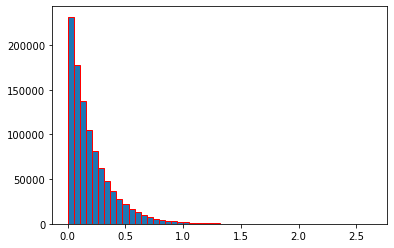

[2.64195580e+05 4.99824087e+00]


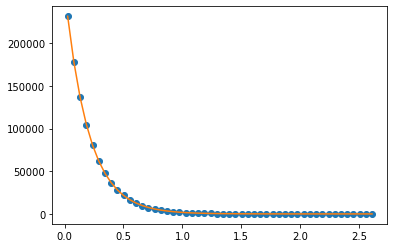

(50, 50)

In [2]:
def f(x,A,l):
    return A*np.exp(-(l*x))

x= np.random.random(10**6)
beta=5
z=-(np.log(x)/beta)
z
c,b,p=plt.hist(z,50,ec='red')
plt.show()
bcenter=(b[:-1]+b[1:])/2
plt.plot(bcenter,c, 'o')

p,s=curve_fit(f,bcenter,c)
print(p)
plt.plot(bcenter, f(bcenter, *p))
plt.show()

bcenter.size, c.size

Q2.Generate 1 M Gaussian variate by averaging over 𝑁 trials.

Fit the histogram of the gaussian random numbers thus created by $\displaystyle{ 𝑓(𝑦, 𝐴, 𝜇, 𝜎) = 𝐴 \exp(−\frac{(𝑦−𝜇)^2}{\sigma^2})}$ 

Study the variation of 𝜎 with N.


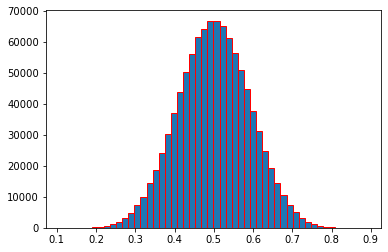

mu= 133.4877659961617 sigma= 2334.731998213475
[20031.86329415   133.487766    2334.73199821]


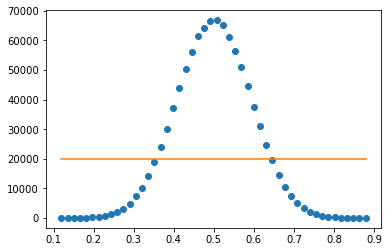

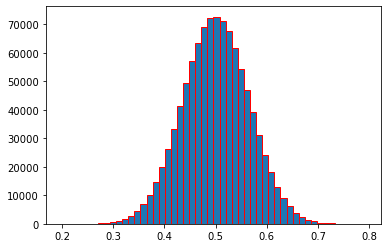

mu= 0.5000641531769916 sigma= -0.06516529066230776
[ 7.29681152e+04  5.00064153e-01 -6.51652907e-02]


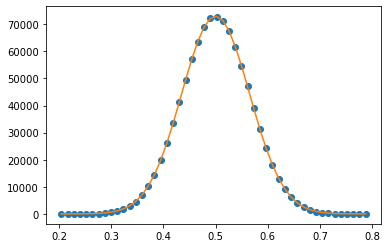

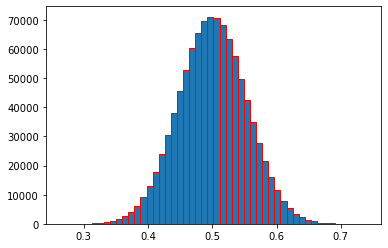

mu= -506.9166905661866 sigma= 1705.6087428312417
[20904.61661365  -506.91669057  1705.60874283]


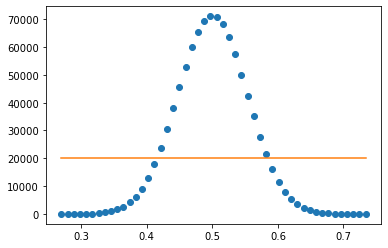

In [3]:
def f(x,A,mu,sig):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

N=[10,20,30]
for i in N:
    R= np.random.rand(i,10**6)
    B=np.mean(R,0)
    B
    c,b,p=plt.hist(B,50,ec='red')
    #print('count',c,'\n\n binborder',b)
    plt.show()
    bcenter=(b[:-1]+b[1:])/2
    plt.plot(bcenter,c, 'o')

    p,s=curve_fit(f,bcenter,c,maxfev=10000)
    A,mu,sig=p
    print('mu=',mu ,'sigma=',sig )
    print(p)
    plt.plot(bcenter, f(bcenter, *p))
    plt.show()

Q3.Use a gaussian random number with a user specified value of 𝜇 and 𝜎. Check the 𝜇 and 𝜎 obtained by your algorithm. Use 𝑁 = 20

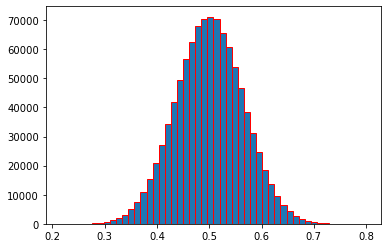

mu= 0.5000201460765638 sigma= 0.06518821402334708
[7.13669841e+04 5.00020146e-01 6.51882140e-02]


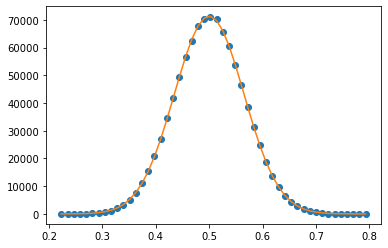

In [4]:
def f(x,A,mu,sig):
    return A*np.exp(-(x-mu)**2/(2*sig**2))

N=20    
R= np.random.rand(N,10**6)
#x
B=np.mean(R,0)
B
c,b,p=plt.hist(B,50,ec='red')
#print('count',c,'\n\n binborder',b)
plt.show()
bcenter=(b[:-1]+b[1:])/2
plt.plot(bcenter,c, 'o')

p,s=curve_fit(f,bcenter,c,maxfev=10000)
A,mu,sig=p
print('mu=',mu ,'sigma=',sig )
print(p)
plt.plot(bcenter, f(bcenter, *p))
plt.show()

,binborder,count
0,1.016762,5.0
1,1.032238,10.0
2,1.047714,25.0
3,1.063190,41.0
4,1.078666,79.0
5,1.094142,183.0
6,1.109618,335.0
7,1.125094,689.0
8,1.140570,1199.0
9,1.156046,2056.0


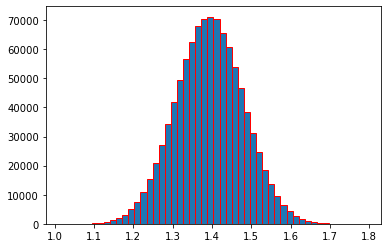

given mu= 0.7 given sigma= 0.07
mu= 1.3929458911153147 sigma= -0.08667321645412744


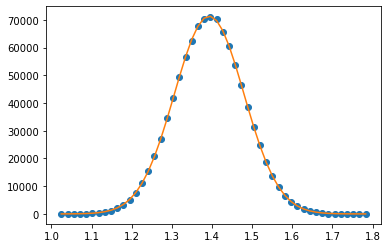

In [8]:
N=20
new_mu=0.7
new_sig=.07
B=B*(new_sig/sig)+(new_mu-mu*(new_sig/sig))

def f(x,A,mu,sig):
    return A*np.exp(-(x-mu)**2/(2*sig**2))
    
#x= np.random.rand(N,10**6)
#A1=7
#mu1=4
#sig1=6
#z=A1*np.exp(-(x-mu1)**2/(2*sig1**2))
#B=np.mean(R,0)
#B
Bb,Cc=[],[]
c,b,p=plt.hist(B,50,ec='red')
for i in range(len(c)):
    Bb.append(b[i])
    Cc.append(c[i])
display(pd.DataFrame({'binborder':Bb,'count':Cc}))
plt.show()
bcenter=(b[:-1]+b[1:])/2
#plt.plot(bcenter,c, 'o')

p1,s1=curve_fit(f,bcenter,c,maxfev=10000)
A1,mu1,sig1=p1
print('given mu=',new_mu,'given sigma=',new_sig)
print('mu=',mu1 ,'sigma=',sig1 )

plt.plot(bcenter,c, 'o',bcenter, f(bcenter, *p1))
plt.show()
